# Resumo livro - Approaching (almost) any Machine Learning Problem


## Aprendizado Supervisionado e Não-Supervisionado

 ### Aprendizado Supervisionado
- Sempre possui um ou múltiplos targets associados 
- Usado quando queremos prever um valor 

     - Exemplo 1: Prever preço de uma casa com base em features ou atributos como presença de hospital, escola e mercado na localidade, distância para transporte público e etc.
     - Exemplo 2 : Prever se uma imágem é um cachorro ou um gato 
            - obs : E se treinar o modelo com cachorro e gato e em produção a gente avaliar um elefante? Para refletir 
            
- Cada row ou linha de um dataframe é associado a um target

- Se o target for categórico o problema se torna um problema de classificação

- Se o target é um número real, temos um problema de regressão

- Problemas supervisionados podem ser:

    - Classificação : Prever uma classe -  cachorro e gato, ou fraude e não fraude.
    - Regressão : Prever um valor real - Valor de uma casa, Valor de energia gerada na próxima hora.
    
> Obs : Muitas vezes podemos usar regressão para resolver um problema de classificação. Isso vai depender da métrica que iremos utilizar. 
                

### Aprendizado Não-Supervisionado
- Dados sem target
    - Imagine um e-comerce recebendo milhares de transações por minuto. Nesse caso, não temos informação se a transação é fraudulenta ou não. Podemos tratar esse problema com aprendizado não-supervisionado e criar clusters para segmentar as transações.
    - Nesse caso, a gente sabe o número de clusters porém é comum em tipos de problemas de aprendizado não supervisionado, termos que descobrir o número de clusters.
- Podemos ainda usar Principal Component Analysis (PCA), t-distributed Stochastic Neighbour Embedding (t-SNE) e várias outras técnicas para tratar desse tipo de problema.
-  Existe uma certa complexidade em achar respostas para problemas que envolvem esse tipo de aprendizado. Dessa forma, entendimento do negócio e heurística se fazem necessário no processo de solução e implementação.
- Em muitos casos é possível converter um problema de aprendizado supervisionado em problema de aprendizado não supervisionado para ver como o dataset se comporta na plotagem.
    - As vezes, o plot pode explicar alguma relação importante que a gente não consegue observar com clareza num primeiro momento.

### Convertendo um dataset supervisionado em não supervisionado
- O objetivo aqui é ver o comportamento dos dados através de plot


#### Dataset : MNIST
> Data set contendo números digitados a mão e é tipicamente tratado como problema supervisionado -> tem-se o target ou resposta.

-  São dadas imagens com os números e queremos descobrir o label associado a essa imagem.

- A idéia é montar um modelo que consegue identificar o número escrito em uma determinada imágem
- Vamos realizar uma decomposição do dataset utilizando o t-Distributed Stochastic Neighbour Embeding(t-SNE).
- As imágens serão separadas através da decomposição dos pixels de cada imagem.

Nota: Add resumo t-SNE


In [10]:
# Primeiramente vamos importar as bibliotecas necessárias
import matplotlib.pyplot as plt # para os plots
import numpy as np # para lidar com arrays numéricos
import pandas as pd # para dataframe
import seaborn as sns # para modelar o t-SNE

from sklearn import datasets,manifold
%matplotlib inline

No código abaixo, nos vamos fazer download dos dados do dadaset MNIST através do sklearn. Teremos então um array com os pixels das imagens e um outro array contendo as targets. A gente converte esses valores de target para inteiros devido ao fato deles virem como string por default.

- pixels é um array com duas dimensões da forma 70000x784, ou seja, 70000 imagens diferentes com cada imagem sendo de tamanho 28x28 pixels.Quando a gente faz o flattening nesses pixels - transformar os pixels em uma dimensão única - teremos 784 pontos.


In [22]:
# Exemplo de flattening
y = np.array([[2,3], [4,5]])
print('array y: \n', y)
print()
print('Transformando y em uma dimensão (flattening):', y.flatten())


array y: 
 [[2 3]
 [4 5]]

Transformando y em uma dimensão (flattening): [2 3 4 5]


In [13]:
# Importando os dados utilizando a função built-in do sklearn
data = datasets.fetch_openml( 'mnist_784',version = 1, return_X_y = True)

pixels, targets = data 
targets = targets.astype(int)

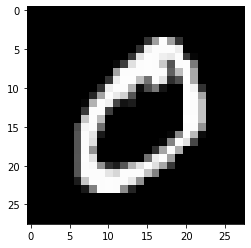

In [20]:
# Vamos analisar uma imagem do dataset. 
# Para isso a gente faz o reshape do array de pixels para seu formato original e em seguida plota a imagem
uma_imagem = pixels[1,:].reshape(28,28)
plt.imshow(uma_imagem, cmap = 'gray')

Agora a gente vai criar uma transformação t-SNE. Vamos usar somente duas dimensões pois queremos analisar o plot nessas dimensões.

Podemos ver que a variável dados_transformados é um array da forma 3000x2, ou seja, 3000 linhas e 2 colunas. Vamos em seguida converter esse array em dataframe.

In [24]:
t_SNE = manifold.TSNE(n_components = 2, random_state = 10)

dados_transformados = t_SNE.fit_transform(pixels[:3000,:])

In [25]:
dados_transformados

array([[ 32.232513 ,   6.872189 ],
       [ 70.830536 ,   3.3728142],
       [ -9.728212 , -50.67145  ],
       ...,
       [-43.81899  ,  -8.3029785],
       [ -9.310774 ,   6.603938 ],
       [ 12.435616 ,  -1.734201 ]], dtype=float32)

In [26]:
# Transformando os arrays em dataframe
tsne_df = pd.DataFrame(np.column_stack((dados_transformados, targets[:3000])), columns = ['x', 'y', 'targets'])

tsne_df.loc[:, 'targets'] = tsne_df.targets.astype(int)

tsne_df

x          y  targets
0     32.232513   6.872189        5
1     70.830536   3.372814        0
2     -9.728212 -50.671452        4
3    -47.030968  29.608160        1
4    -18.796610 -26.308842        9
...         ...        ...      ...
2995 -52.943554 -14.334416        7
2996  69.731476  -3.832609        0
2997 -43.818989  -8.302979        9
2998  -9.310774   6.603938        1
2999  12.435616  -1.734201        5

[3000 rows x 3 columns]

Notar que as colunas x e y são os componentes do t-SNE e a ultima coluna é o target correspondendo ao número da imagem.

Vamos então plotar o gráfico.

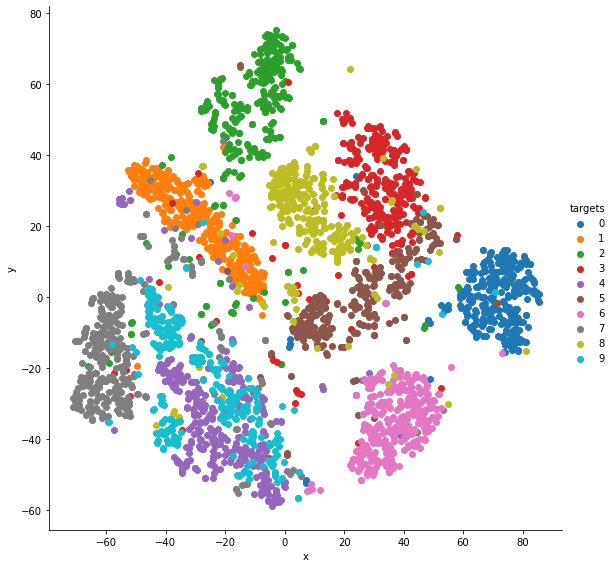

In [30]:
grid = sns.FacetGrid(tsne_df, hue='targets', height = 8)
grid.map(plt.scatter, 'x', 'y').add_legend()

Essa é uma forma com que podemos tratar esse problema como um problema de aprendizado não-supervisionado. Poderíamos ainda aplicar k-means clustering e verificar o que os clusters nos dariam de informação com relação a esse dataset.

O dataset Mnist é geralmente tratado como problema supervisionado mas nessa nossa pequena análise, nós fizemos uso de técnicas de problema não supervisionado para nos dar insights do dataset.